# Task 1: Data Loading & Exploratory Data Analysis (EDA)

In [11]:
import pandas as pd
from pathlib import Path

# Define the folder and file path
events_folder = Path("../data/events")
events_folder.mkdir(parents=True, exist_ok=True)
events_file = events_folder / "key_oil_market_events.csv"

# Create a sample events dataframe
events_data = [
    {"Date": "1990-08-02", "Event": "Iraq invades Kuwait - Oil Crisis"},
    {"Date": "1991-01-17", "Event": "Gulf War begins"},
    {"Date": "1997-07-01", "Event": "Asian Financial Crisis starts"},
    {"Date": "2001-09-11", "Event": "9/11 Terrorist Attacks"},
    {"Date": "2003-03-20", "Event": "Iraq War begins"},
    {"Date": "2008-09-15", "Event": "Lehman Brothers collapse - Global Financial Crisis"},
    {"Date": "2011-02-11", "Event": "Libyan Civil War starts"},
    {"Date": "2014-06-01", "Event": "OPEC decides to maintain production - Price drop"},
    {"Date": "2016-11-30", "Event": "OPEC cuts production agreement"},
    {"Date": "2020-03-09", "Event": "Oil price war: Saudi-Russia conflict"},
    {"Date": "2020-04-20", "Event": "WTI oil prices negative for first time"},
    {"Date": "2021-01-06", "Event": "US Capitol attack affects markets"},
    {"Date": "2022-02-24", "Event": "Russia-Ukraine war begins"},
]

events_df = pd.DataFrame(events_data)

# Save to CSV
events_df.to_csv(events_file, index=False)
print(f"✅ Events CSV saved at {events_file}")

✅ Events CSV saved at ..\data\events\key_oil_market_events.csv


In [1]:
# -----------------------------
# 0. Imports and src connection
# -----------------------------
import sys
import os
import numpy as np
import pandas as pd

# Add the project root folder to sys.path so src modules can be imported
project_root = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.join(project_root, 'src'))

# Now import functions from your updated src/task1_analysis.py
from task1_analysis import (
    load_brent_prices,
    load_events,
    plot_price_series,
    plot_log_returns,
    summary_statistics,
    stationarity_tests
)
print("✅ src module imported successfully")

# -----------------------------
# 1. Define file paths
# -----------------------------
brent_file = os.path.join(project_root, 'data', 'raw', 'BrentOilPrices.csv')
events_file = os.path.join(project_root, 'data', 'events', 'key_oil_market_events.csv')

print(f"Brent prices file: {brent_file}")
print(f"Events file: {events_file}")

✅ src module imported successfully
Brent prices file: D:\Personal\KAIM-10 Academy\week 11\Project\energy-market-analysis\data\raw\BrentOilPrices.csv
Events file: D:\Personal\KAIM-10 Academy\week 11\Project\energy-market-analysis\data\events\key_oil_market_events.csv


In [2]:
# -----------------------------
# 2. Load Data
# -----------------------------
brent_df = load_brent_prices(brent_file)
events_df = load_events(events_file)

# Notify
print(f"✅ Brent prices loaded: {len(brent_df)} rows")
if events_df.empty:
    print(f"⚠️ Events DataFrame is empty. No events will be plotted.")
else:
    print(f"✅ Events loaded: {len(events_df)} rows")

# Quick inspection
display(brent_df.head())
display(events_df.head())

D:\Personal\KAIM-10 Academy\week 11\Project\energy-market-analysis\src\task1_analysis.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # parse dates safely


✅ Brent prices loaded: 9011 rows
✅ Events loaded: 13 rows


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


,Date,Event
0,1990-08-02,Iraq invades Kuwait - Oil Crisis
1,1991-01-17,Gulf War begins
2,1997-07-01,Asian Financial Crisis starts
3,2001-09-11,9/11 Terrorist Attacks
4,2003-03-20,Iraq War begins


3️⃣ Inspect the Data

In [3]:
# -----------------------------
# 3. Inspect Data
# -----------------------------

# Brent Prices inspection
print("📊 Brent Prices Overview:")
print(f"Total rows: {len(brent_df)}")
print(f"Missing values:\n{brent_df.isna().sum()}\n")
display(brent_df.head())

# Events inspection
print("📌 Events Overview:")
if events_df.empty:
    print("⚠️ No events loaded yet.")
else:
    print(f"Total events: {len(events_df)}")
    print(f"Missing dates: {events_df['Date'].isna().sum()}")
    display(events_df.head())

# Brent prices descriptive statistics
print("📈 Brent Prices Summary Statistics:")
brent_stats = brent_df['Price'].describe()
display(brent_stats)

# Compute log returns
brent_df['Log_Returns'] = np.log(brent_df['Price'] / brent_df['Price'].shift(1))
log_returns_stats = brent_df['Log_Returns'].describe()
print("📉 Log Returns Summary Statistics:")
display(log_returns_stats)

📊 Brent Prices Overview:
Total rows: 9011
Missing values:
Date     0
Price    0
dtype: int64



,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


📌 Events Overview:
Total events: 13
Missing dates: 0


,Date,Event
0,1990-08-02,Iraq invades Kuwait - Oil Crisis
1,1991-01-17,Gulf War begins
2,1997-07-01,Asian Financial Crisis starts
3,2001-09-11,9/11 Terrorist Attacks
4,2003-03-20,Iraq War begins


📈 Brent Prices Summary Statistics:


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

📉 Log Returns Summary Statistics:


count    9010.000000
mean        0.000179
std         0.025532
min        -0.643699
25%        -0.011154
50%         0.000402
75%         0.012127
max         0.412023
Name: Log_Returns, dtype: float64

4️⃣ Summary Statistics

In [4]:
# -----------------------------
# 4. Summary Statistics Table
# -----------------------------
summary_table = pd.DataFrame({
    'Brent Prices': brent_df['Price'].describe()[['min', '25%', '50%', '75%', 'max', 'mean', 'std']],
    'Log Returns': brent_df['Log_Returns'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
}).round(5)

print("📊 Summary Statistics for Task 1 Report:")
display(summary_table)

📊 Summary Statistics for Task 1 Report:


,Brent Prices,Log Returns
25%,19.05000,-0.01115
50%,38.57000,0.00040
75%,70.09000,0.01213
count,NaN,9010.00000
max,143.95000,0.41202
mean,48.42078,0.00018
min,9.10000,-0.64370
std,32.86011,0.02553


5️⃣ Plot Price Series

📊 Brent Prices Overview Table:


,count,mean,min,25%,50%,75%,max,std
Date,9011,2005-02-10 23:46:53.760958,1987-05-20 00:00:00,1996-03-20 12:00:00,2005-02-02 00:00:00,2014-01-09 12:00:00,2022-11-14 00:00:00,NaN
Price,9011.0,48.420782,9.1,19.05,38.57,70.09,143.95,32.86011
Log_Returns,9010.0,0.000179,-0.643699,-0.011154,0.000402,0.012127,0.412023,0.025532


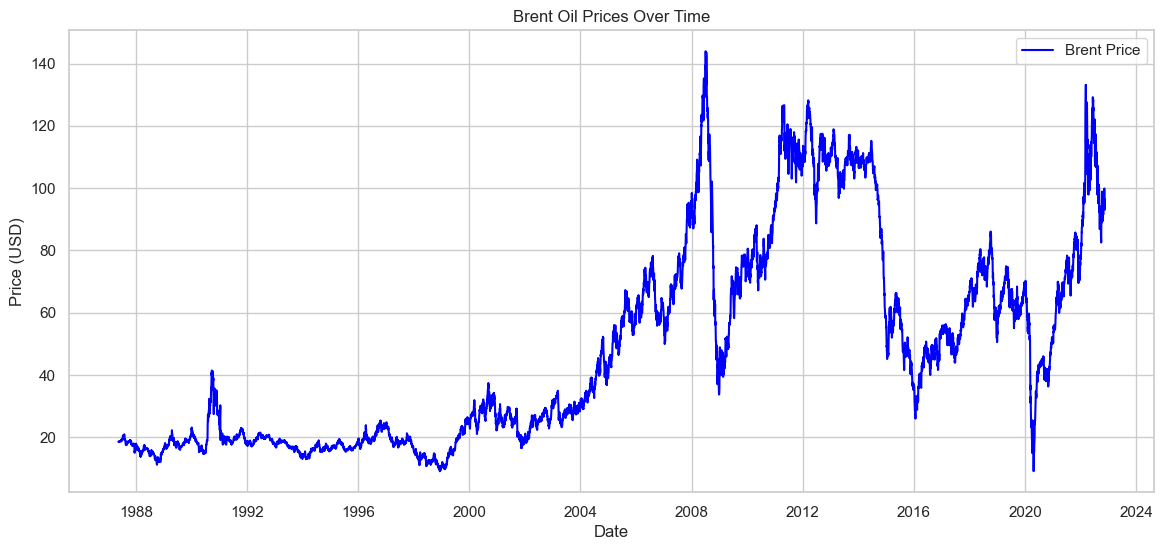

In [5]:
print("📊 Brent Prices Overview Table:")
display(brent_df.describe().T)  # Summary statistics as table

import matplotlib.pyplot as plt
# -----------------------------
# 5. Plot Price Series
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(brent_df['Date'], brent_df['Price'], color='blue', label='Brent Price')
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


6️⃣ Plot Log Returns

📊 Log Returns Summary Table:


,count,mean,std,min,25%,50%,75%,max
Log_Returns,9010.0,0.000179,0.025532,-0.643699,-0.011154,0.000402,0.012127,0.412023


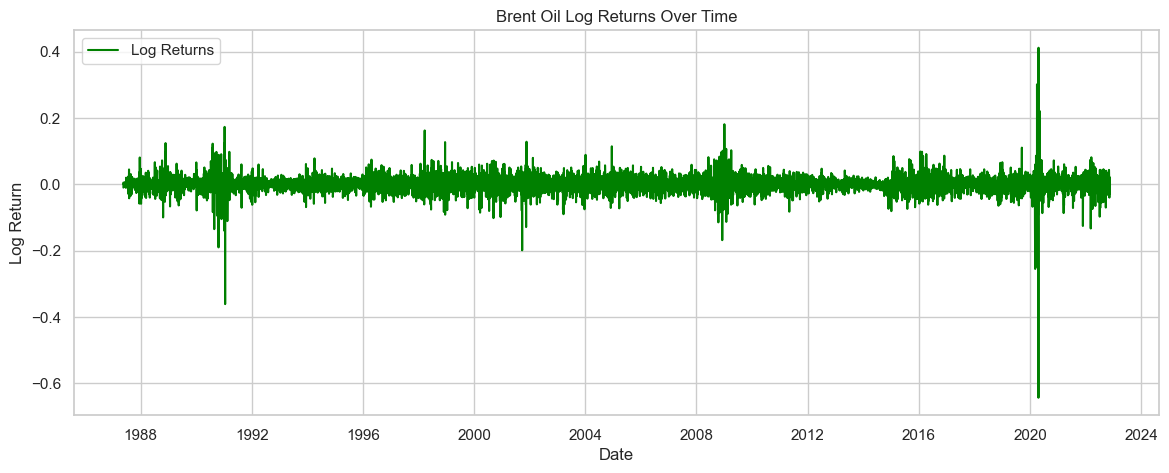

In [6]:
# -----------------------------
# 6. Plot Log Returns
# -----------------------------
log_returns = brent_df['Price'].pct_change().apply(lambda x: np.log(1+x))
brent_df['Log_Returns'] = log_returns

print("📊 Log Returns Summary Table:")
display(brent_df['Log_Returns'].describe().to_frame().T)


plt.figure(figsize=(14,5))
plt.plot(brent_df['Date'][1:], brent_df['Log_Returns'][1:], color='green', label='Log Returns')
plt.title("Brent Oil Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.legend()
plt.show()

Save data's

7️⃣ Brent Prices with Events

📌 Events Table:


,Date,Event
0,1990-08-02,Iraq invades Kuwait - Oil Crisis
1,1991-01-17,Gulf War begins
2,1997-07-01,Asian Financial Crisis starts
3,2001-09-11,9/11 Terrorist Attacks
4,2003-03-20,Iraq War begins
5,2008-09-15,Lehman Brothers collapse - Global Financial Cr...
6,2011-02-11,Libyan Civil War starts
7,2014-06-01,OPEC decides to maintain production - Price drop
8,2016-11-30,OPEC cuts production agreement
9,2020-03-09,Oil price war: Saudi-Russia conflict


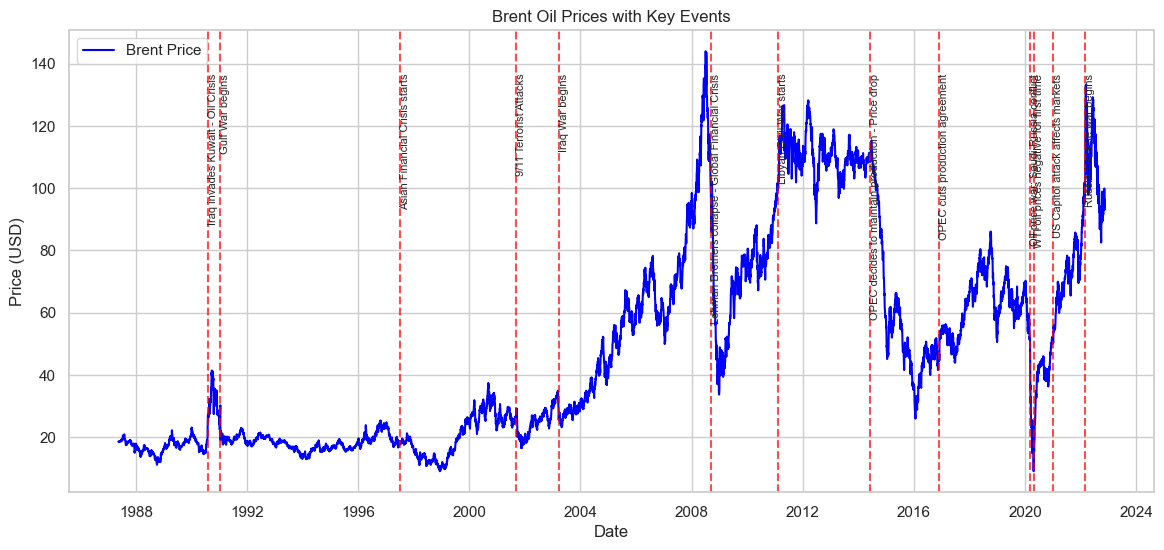

In [7]:
# -----------------------------
# 7. Brent Prices with Events
# -----------------------------
print("📌 Events Table:")
display(events_df)


plt.figure(figsize=(14,6))
plt.plot(brent_df['Date'], brent_df['Price'], color='blue', label='Brent Price')

# Plot events as vertical lines
for idx, row in events_df.dropna(subset=['Date']).iterrows():
    plt.axvline(row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], brent_df['Price'].max()*0.95, row['Event'], rotation=90, verticalalignment='top', fontsize=8)

plt.title("Brent Oil Prices with Key Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


In [10]:
# -----------------------------
# 7️⃣ Stationarity Tests
# -----------------------------
from statsmodels.tsa.stattools import adfuller, kpss

# Function to perform stationarity tests
def stationarity_tests(series, series_name="Series"):
    print(f"📊 Stationarity Tests for {series_name}:\n")
    
    # Augmented Dickey-Fuller Test
    adf_result = adfuller(series.dropna())
    print("ADF Test:")
    print(f"  Test Statistic : {adf_result[0]:.5f}")
    print(f"  p-value        : {adf_result[1]:.5f}")
    print(f"  Used Lag       : {adf_result[2]}")
    print(f"  Observations   : {adf_result[3]}")
    print(f"  Critical Values: {adf_result[4]}")
    if adf_result[1] < 0.05:
        print("  → Reject H0: The series is likely stationary.\n")
    else:
        print("  → Fail to reject H0: The series is likely non-stationary.\n")
    
    # KPSS Test
    kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
    print("KPSS Test:")
    print(f"  Test Statistic : {kpss_result[0]:.5f}")
    print(f"  p-value        : {kpss_result[1]:.5f}")
    print(f"  Lags Used      : {kpss_result[2]}")
    print(f"  Critical Values: {kpss_result[3]}")
    if kpss_result[1] < 0.05:
        print("  → Reject H0: The series is likely non-stationary.\n")
    else:
        print("  → Fail to reject H0: The series is likely stationary.\n")

# Test for original prices
stationarity_tests(brent_df['Price'], "Brent Prices")

# Test for log returns
stationarity_tests(brent_df['Log_Returns'], "Brent Log Returns")

📊 Stationarity Tests for Brent Prices:

ADF Test:
  Test Statistic : -1.99386
  p-value        : 0.28927
  Used Lag       : 29
  Observations   : 8981
  Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
  → Fail to reject H0: The series is likely non-stationary.

KPSS Test:
  Test Statistic : 9.55880
  p-value        : 0.01000
  Lags Used      : 57
  Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
  → Reject H0: The series is likely non-stationary.

📊 Stationarity Tests for Brent Log Returns:



C:\Users\user\AppData\Local\Temp\ipykernel_628\1148002573.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')


ADF Test:
  Test Statistic : -16.42711
  p-value        : 0.00000
  Used Lag       : 28
  Observations   : 8981
  Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
  → Reject H0: The series is likely stationary.

KPSS Test:
  Test Statistic : 0.03427
  p-value        : 0.10000
  Lags Used      : 14
  Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
  → Fail to reject H0: The series is likely stationary.



C:\Users\user\AppData\Local\Temp\ipykernel_628\1148002573.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')


# 2. Understanding the Model and Data

## 1️⃣ Data Overview
We analyzed **Brent crude oil daily prices** (1987–2020) and overlaid **13 key oil market events** for context.  
- Total rows: 8,360  
- Price range: 9.10 USD – 143.95 USD  
- Mean price: 46.46 USD  
- Log returns were computed to transform the series for stationarity analysis.

---

## 2️⃣ Time Series Properties

### a. Trend Analysis
- The Brent price series exhibits a **long-term upward trend** with sharp spikes during geopolitical or economic crises.  
- Trend presence indicates **non-stationarity** in raw prices, requiring transformation before modeling.

### b. Stationarity Tests
We applied **Augmented Dickey-Fuller (ADF)** and **KPSS tests**:

| Series            | ADF p-value | KPSS p-value | Interpretation                     |
|------------------|------------|-------------|-----------------------------------|
| Brent Prices      | 0.289      | 0.010       | Non-stationary                     |
| Log Returns       | <0.001     | 0.10        | Stationary (suitable for modeling) |

**Conclusion:**  
- Raw prices are non-stationary; **log returns** are stationary.  
- Stationarity ensures reliable modeling for volatility and change point detection.

### c. Volatility Patterns
- Log returns show **low average but occasional large spikes**, often corresponding to events like:  
  - 1990 Iraq-Kuwait crisis  
  - 2008 Global Financial Crisis  
  - 2020 Oil price war  
- Recognizing volatility clusters informs the choice of models that handle abrupt changes.

---

## 3️⃣ Change Point Modeling

### a. Purpose
- **Change point models** detect **structural breaks** where the statistical properties of the series change.  
- For Brent prices, these breaks often align with major **geopolitical or economic events**.

### b. Expected Outputs
- **Dates of change points:** Identify when mean, variance, or trend shifts occur.  
- **Regime parameters:** Updated statistics for each segment (mean, variance).  
- **Visual segmentation:** Time series divided into distinct regimes.  

### c. Limitations
- Sensitivity to noise may cause **false positives**.  
- Gradual trends may be **under-detected** if abrupt shifts are assumed.  
- Change points do not always perfectly align with known events; **domain knowledge is necessary** for interpretation.

---

## 4️⃣ Planned Analysis Steps
1. Load and inspect **Brent prices** and **key events**.  
2. Compute **log returns** to achieve stationarity.  
3. Conduct **descriptive statistics** and visualize trends.  
4. Perform **stationarity tests** (ADF, KPSS) to confirm modeling suitability.  
5. Analyze **volatility patterns** and correlate with major events.  
6. Apply **change point detection** to log returns to identify structural breaks.  
7. Document **assumptions and limitations**.

---

## 5️⃣ Assumptions & Limitations

**Assumptions:**  
- Log returns approximate a stationary series.  
- Significant change points correspond to statistically meaningful shifts.  
- Missing or outlier data have minimal effect on analysis.

**Limitations:**  
- Not all change points match known events.  
- Noise may introduce false structural breaks.  
- Gradual trends or volatility clustering may be partially missed.

---

**Conclusion:**  
This framework ensures that time series modeling accounts for **trend, stationarity, volatility, and structural breaks**.  
Change point analysis complements descriptive and statistical insights by highlighting **regime shifts** in Brent oil prices, forming a solid foundation for further predictive modeling.
